In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [180]:
Training_set = pd.read_csv("heart_disease_3features.csv")

In [181]:
Training_set.head()

,age,trestbps,thalach,heart_disease
0,63.0,145.0,150.0,0
1,67.0,160.0,108.0,1
2,67.0,120.0,129.0,1
3,37.0,130.0,187.0,0
4,41.0,130.0,172.0,0


In [182]:
ts_age = np.array(Training_set["age"])
mean = np.mean(ts_age)
std = np.std(ts_age)
ts_age = ts_age - mean
ts_age = ts_age / std
ts_age

array([ 0.94872647,  1.39200191,  1.39200191, -1.93256387, -1.48928843,
        0.17299446,  0.83790761,  0.28381332,  0.94872647, -0.15946212,
        0.28381332,  0.17299446,  0.17299446, -1.15683185, -0.27028098,
        0.28381332, -0.71355642, -0.04864326, -0.71355642, -0.60273756,
        1.05954533,  0.39463218,  0.39463218,  0.39463218,  0.61626989,
       -0.4919187 ,  0.39463218,  1.28118305, -1.26765071, -1.60010729,
        1.61363963,  0.61626989,  1.05954533,  0.50545103, -1.15683185,
       -1.37846957, -1.26765071,  0.28381332,  0.0621756 ,  0.72708875,
        1.17036419, -1.60010729,  1.83527735,  0.50545103,  0.72708875,
        0.39463218, -0.38109984, -0.4919187 ,  1.17036419, -0.15946212,
       -1.48928843,  1.17036419, -1.15683185, -1.15683185,  0.61626989,
       -0.04864326, -0.4919187 , -1.48928843, -0.04864326, -0.38109984,
       -0.38109984, -0.93519414,  0.39463218, -0.04864326, -0.04864326,
        0.61626989,  0.61626989, -0.04864326,  0.50545103, -0.93

In [183]:
ts_trestbps = np.array(Training_set["trestbps"])
mean = np.mean(ts_trestbps)
std = np.std(ts_trestbps)
ts_trestbps = ts_trestbps - mean
ts_trestbps = ts_trestbps / std
ts_trestbps

array([ 0.75752504,  1.61121989, -0.6652997 , -0.0961698 , -0.0961698 ,
       -0.6652997 ,  0.47296009, -0.6652997 , -0.0961698 ,  0.47296009,
        0.47296009,  0.47296009, -0.0961698 , -0.6652997 ,  2.29417576,
        1.04208999, -1.2344296 ,  0.47296009, -0.0961698 , -0.0961698 ,
       -1.2344296 ,  1.04208999, -0.6652997 ,  0.01765618, -0.0961698 ,
       -0.6652997 , -0.6652997 ,  1.04208999,  1.04208999, -1.2344296 ,
        0.47296009, -0.83603867,  0.47296009,  0.18839514, -0.0961698 ,
        0.47296009, -0.6652997 ,  1.04208999,  0.01765618,  1.04208999,
        1.04208999,  0.47296009,  1.61121989,  1.04208999, -0.0961698 ,
       -1.12060362, -1.2344296 ,  1.04208999,  0.47296009, -0.0961698 ,
       -1.51899455, -0.6652997 , -1.12060362, -0.0961698 , -0.0961698 ,
       -0.43764774,  0.47296009, -1.2344296 , -0.38073475, -0.38073475,
       -0.0961698 ,  0.58678607, -0.20999578,  0.18839514, -0.6652997 ,
        0.75752504,  0.47296009,  1.04208999,  2.18034978,  1.04

In [184]:
ts_thalach = np.array(Training_set["thalach"])
mean = np.mean(ts_thalach)
std = np.std(ts_thalach)
ts_thalach = ts_thalach - mean
ts_thalach = ts_thalach / std
ts_thalach

array([ 0.01719733, -1.82190531, -0.90235399,  1.63735918,  0.98053681,
        1.24326576,  0.45507891,  0.58644339, -0.11416714,  0.23613812,
       -0.07037899,  0.1485618 , -0.33310794,  1.02432497,  0.54265523,
        1.06811312,  0.80538418,  0.45507891, -0.46447241,  0.93674865,
       -0.24553162,  0.54265523,  0.45507891,  1.02432497, -0.77098952,
        0.36750259,  0.98053681, -1.55917636,  0.93674865, -1.55917636,
        0.06098549,  0.45507891,  0.36750259,  0.49886707,  1.28705392,
        1.24326576, -1.29644741, -1.64675268, -0.77098952, -0.55204873,
       -1.55917636,  1.24326576,  0.54265523,  0.32371444,  0.84917233,
        0.6740197 , -1.16508294, -0.94614215,  0.32371444,  0.10477365,
        0.80538418, -0.42068425,  0.1485618 ,  1.68114734, -0.24553162,
       -1.77811715,  0.58644339,  0.36750259,  0.10477365, -1.07750662,
       -0.33310794,  0.45507891, -0.81477768,  0.89296049, -1.60296452,
       -0.33310794,  0.23613812,  0.6740197 , -0.42068425, -0.11

In [185]:
ts_target = np.array(Training_set["heart_disease"])

In [186]:
def cost_calc(w1,w2,w3,w4,w5,w6,w7,w8,w9,b):
    cost = 0
    m = len(ts_age)
    for i in range(len(ts_age)):
        y = ts_target[i]
        y_hat = w1*ts_age[i] + ts_trestbps[i]*w2 + ts_thalach[i]*w3 + w4*ts_age[i]*ts_trestbps[i] +  w5*ts_age[i]*ts_thalach[i] + w6*ts_thalach[i]*ts_trestbps[i]+ w7*ts_age[i]*ts_age[i] + w8*ts_trestbps[i]*ts_trestbps[i] + w9*ts_thalach[i]*ts_thalach[i] + b
        y_hat = 1 / (1 + math.exp(-y_hat))
        eps = 1e-15
        y_hat = max(min(y_hat, 1 - eps), eps)
        current_cost = (-y* math.log(y_hat)) - ((1-y)* math.log(1-y_hat))
        cost += current_cost
    return cost/m

In [187]:
cost_calc(1,2,3,4,6,3,2,4,7,8)

np.float64(9.50277289502943)

In [188]:
def gradient_comp(w1,w2,w3,w4,w5,w6,w7,w8,w9,b):
    m = len(ts_age)
    dw1 = 0
    dw2 = 0
    dw3 = 0
    dw4 = 0
    dw5 = 0
    dw6 = 0
    dw7 = 0
    dw8 = 0
    dw9 = 0
    db = 0
    for i in range(m):
        y_hat = w1*ts_age[i] + ts_trestbps[i]*w2 + ts_thalach[i]*w3 + w4*ts_age[i]*ts_trestbps[i] +  w5*ts_age[i]*ts_thalach[i] + w6*ts_thalach[i]*ts_trestbps[i]+ w7*ts_age[i]*ts_age[i] + w8*ts_trestbps[i]*ts_trestbps[i] + w9*ts_thalach[i]*ts_thalach[i] + b
        y_hat = 1 / (1 + math.exp(-y_hat))
        y = ts_target[i]
        dw1 += ((y_hat - y)*ts_age[i])/m
        dw2 += ((y_hat - y)*ts_trestbps[i])/m
        dw3 += ((y_hat - y)*ts_thalach[i])/m
        dw4 += ((y_hat - y) * ts_age[i] * ts_trestbps[i]) / m
        dw5 += ((y_hat - y) * ts_age[i] * ts_thalach[i]) / m
        dw6 += ((y_hat - y) * ts_thalach[i] * ts_trestbps[i]) / m
        dw7 += ((y_hat - y) * ts_age[i] * ts_age[i]) / m
        dw8 += ((y_hat - y) * ts_trestbps[i] * ts_trestbps[i]) / m
        dw9 += ((y_hat - y) * ts_thalach[i] * ts_thalach[i]) / m
        db += (y_hat  - y)/m
    return dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,db

In [189]:
def gradient_descent(epochs=2000,learning_rate=0.01):
    w1=0
    w2=0
    w3=0
    w4=0
    w5=0
    w6=0
    w7=0
    w8=0
    w9=0
    b =0
    cost_history = []
    m = len(ts_age)
    for i in range (epochs):
        dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,db = gradient_comp(w1,w2,w3,w4,w5,w6,w7,w8,w9,b)
        w1 = w1 - learning_rate*dw1
        w2 = w2 - learning_rate*dw2
        w3 = w3 - learning_rate*dw3
        w4 = w4 - learning_rate*dw4
        w5 = w5 - learning_rate*dw5
        w6 = w6 - learning_rate*dw6
        w7 = w7 - learning_rate*dw7
        w8 = w8 - learning_rate*dw8
        w9 = w9 - learning_rate*dw9
        b  = b  - learning_rate*db
        if i%100==0:
            cost = cost_calc(w1,w2,w3,w4,w5,w6,w7,w8,w9,b)
            print(cost)
            cost_history.append(cost)
    x_points = np.linspace(1,epochs//100,epochs//100)
    sns.lineplot(x = x_points, y = cost_history, color = "red", label = "Error after every 100 steps") 
    plt.xlabel("iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    return w1,w2,w3,w4,w5,w6,w7,w8,w9,b

0.69225346154559


0.6348300984381742
0.6090976572545923
0.5952351089519482
0.5867909170957333
0.5811957410414845
0.5772596851808678
0.5743661093077355
0.5721667980812163
0.5704513892776215
0.569085706060913
0.5679802713702552
0.5670731756585808
0.5663202447433132
0.5656891344277649
0.5651556406191385
0.5647013124015448
0.5643118600247756
0.5639760640373851
0.563685009826567


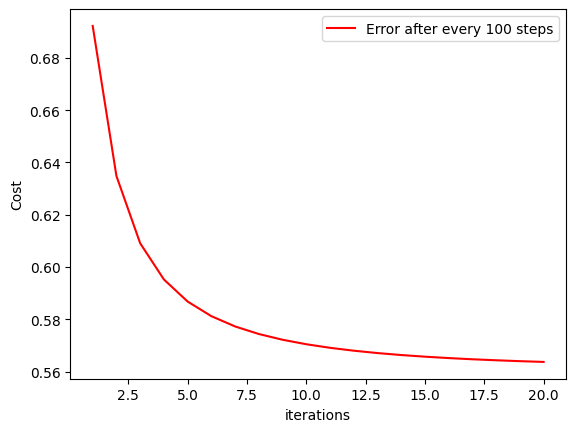

0.14276837646536344 0.2469134084659433 -0.8948455312587823 -0.107758214705338 0.48980365397459263 -0.14584285752861828 -0.08743802344634025 0.04934514308066269 0.12870816809597066 -0.09853057600419224


In [190]:
ow1,ow2,ow3,ow4,ow5,ow6,ow7,ow8,ow9,ob = gradient_descent()
print(ow1,ow2,ow3,ow4,ow5,ow6,ow7,ow8,ow9,ob)

In [191]:
def predict_heart_disease(age, trestbps, thalach):
    x1 = (age - (Training_set["age"].mean()))/ Training_set["age"].std()
    x2 = (trestbps- (Training_set["trestbps"].mean()))/ Training_set["trestbps"].std()
    x3 = (thalach- (Training_set["thalach"].mean()))/ Training_set["thalach"].std()
    result = ow1*x1 + x2*ow2 + x3*ow3 +ow4*x1*x2 + ow5*x1*x3 + ow6*x2*x3 + ow7*x1*x1 +ow8*x2*x2 + ow9*x3*x3 + ob
    result = 1 / (1 + math.exp(-result))
    if result >0.5:
        print("You might have a heart problem get diagnosed")
    else:
        print("You are fine but you can still go for a diagnose")
    


In [192]:

predict_heart_disease(50, 120, 160) 

You are fine but you can still go for a diagnose
